In [1]:
import cv2
import matplotlib.pyplot as plt

In [5]:
# Define class labels
class_labels = {
    1: 'debris',
    2: 'water',
    3: 'building-no-damage',
    4: 'building-medium-damage',
    5: 'building-major-damage',
    6: 'building-total-destruction',
    7: 'vehicle',
    8: 'road',
    9: 'tree',
    10: 'pool',
    11: 'sand'
}

bi_labels = {
    0: "undamaged building",
    1: "damaged building"
}

# Define colors for each class
colors = {
    1: (0, 255, 0),     # Green for debris
    2: (0, 0, 255),     # Red for water
    3: (255, 0, 0),     # Blue for building-no-damage
    4: (255, 255, 0),   # Cyan for building-medium-damage
    5: (0, 255, 255),   # Yellow for building-major-damage
    6: (255, 0, 255),   # Magenta for building-total-destruction
    7: (0, 165, 255),   # Orange for vehicle
    8: (255, 165, 0),   # Orange for road
    9: (255, 20, 147),  # Deep pink for tree
    10: (138, 43, 226), # Blue violet for pool
    11: (75, 0, 130)    # Indigo for sand
}
bi_colors = {
    0: (0,255,0), # undamaged building   GREEN
    1: (0,0,255)  # undamaged building RED
}

In [9]:
def visualize_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image,(640,640))
    
    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [13]:
def visualize_bboxes(image_path, annotations_file):
    # Read the image
    image = cv2.imread(image_path)
    # resize image to 640x640
    image = cv2.resize(image, (640, 640))
    print(image.shape)
    if image is None:
        print(f"Error loading image: {image_path}")
        return
    
    # Read the annotations
    with open(annotations_file, 'r') as f:
        annotations = f.readlines()
    
    # Parse the annotations
    h, w, _ = image.shape
    for annotation in annotations:
        parts = annotation.strip().split()
        class_id, x_center, y_center, width, height = parts
        
        # Convert YOLO format to bounding box coordinates
        x_center = float(x_center) * w
        y_center = float(y_center) * h
        width = float(width) * w
        height = float(height) * h
        x_min = int(x_center - width / 2)
        y_min = int(y_center - height / 2)
        x_max = int(x_center + width / 2)
        y_max = int(y_center + height / 2)
        
        # Get class ID as integer
        class_id = int(class_id)
        
        # Draw the bounding box
        color = bi_colors.get(class_id, (255, 255, 255))  # Default to white if class_id not found
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)
        label = bi_labels.get(class_id, 'unknown')
        cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

(640, 640, 3)
[[[ 82 107 121]
  [  6   5  12]
  [ 17  14  16]
  ...
  [ 50  66  73]
  [ 37  52  61]
  [ 49  67  76]]

 [[  6  10  18]
  [ 20  17  16]
  [ 22  15  18]
  ...
  [ 45  60  70]
  [ 37  52  61]
  [ 58  74  86]]

 [[ 19  13  15]
  [ 18  13  14]
  [ 20  15  16]
  ...
  [ 54  68  80]
  [ 52  64  76]
  [ 51  67  80]]

 ...

 [[207 213 217]
  [117 126 139]
  [109 127 144]
  ...
  [127 121 110]
  [  0 255   0]
  [  0 255   0]]

 [[ 46  52  68]
  [ 89 102 118]
  [ 34  53  69]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[ 95 105 122]
  [115 130 146]
  [121 140 155]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]] (563, 426) (639, 639) (0, 255, 0) 2
[[[ 82 107 121]
  [  6   5  12]
  [ 17  14  16]
  ...
  [ 50  66  73]
  [ 37  52  61]
  [ 49  67  76]]

 [[  6  10  18]
  [ 20  17  16]
  [ 22  15  18]
  ...
  [ 45  60  70]
  [ 37  52  61]
  [ 58  74  86]]

 [[ 19  13  15]
  [ 18  13  14]
  [ 20  15  16]
  ...
  [ 54  68  80]
  [ 52  64  76]
  [ 51  67  80]]

 ...

 [

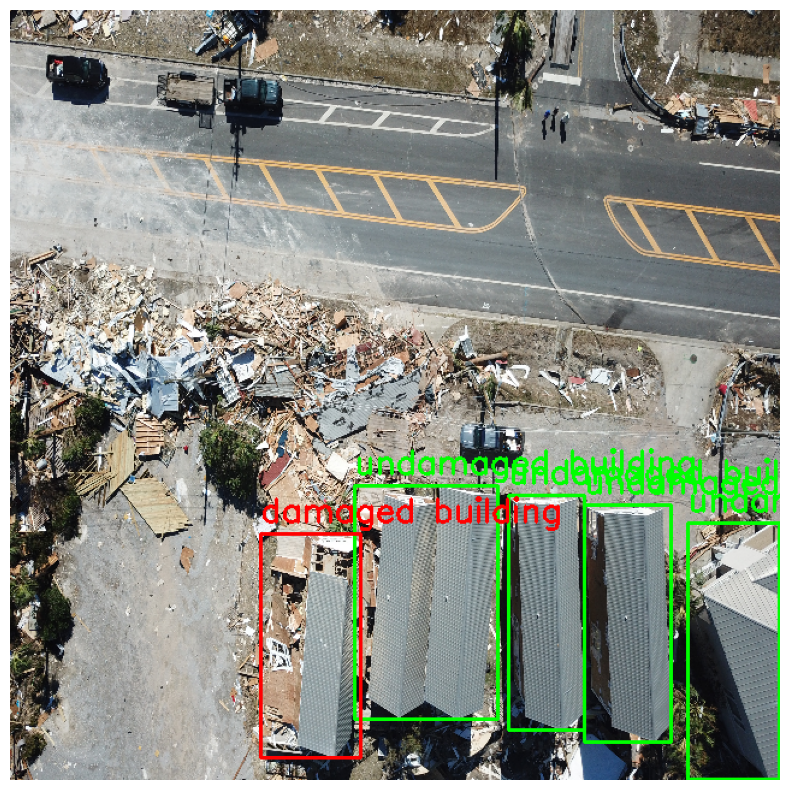

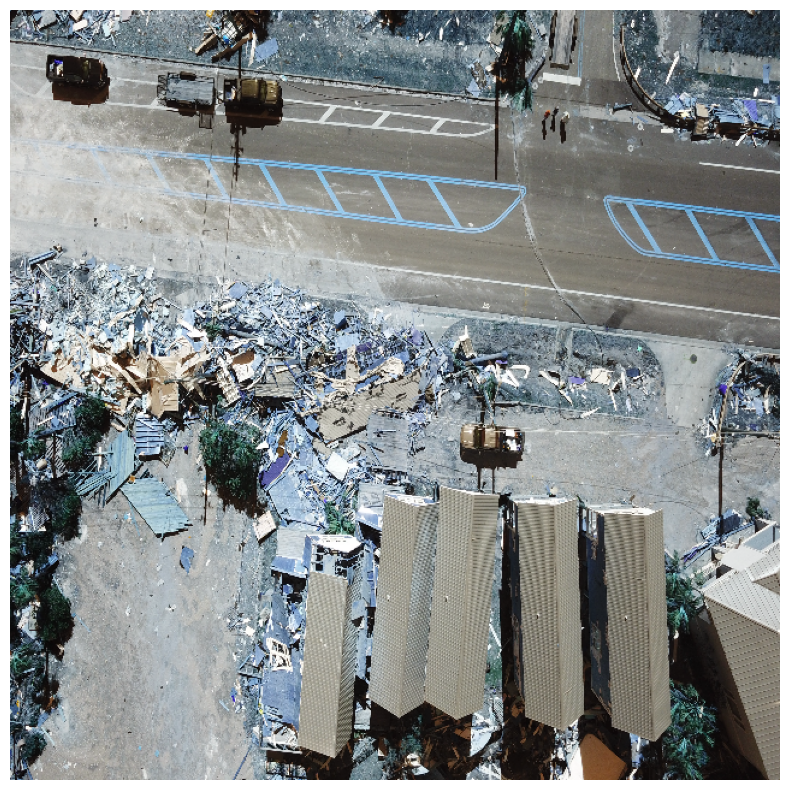

In [28]:
image_path = "../data/images/train/10862.jpg"
bbox_path = "../data_exploration/labels/train/10862.txt"
visualize_bboxes(image_path,bbox_path)
visualize_image(image_path)